In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras_preprocessing
import matplotlib.pyplot as plt

from skimage.color import rgb2lab, lab2rgb
from keras.models import Model, load_model
from keras.models import Sequential
from keras.utils import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [2]:
train_dir = "Face_train/"
test_dir = "test_images/"

In [3]:
train = []
for filename in os.listdir(train_dir):
    train.append(img_to_array(load_img(train_dir + filename)))
train = np.array(train, dtype = float)

In [4]:
print(train.shape) # number of pictures followed by the dimensions of the pictures

(300, 128, 128, 3)


In [5]:
train = train / 255

In [6]:
#Convert from RGB to LAB
X = []
Y = []
for img in train:
    try:
        lab = rgb2lab(img)
        X.append(lab[:,:,0])
        Y.append(lab[:,:,1:] / 128)
    except:
        print('error')

In [7]:
X = np.array(X)
Y = np.array(Y)

X = X.reshape(X.shape + (1,)) #dimensions to be the same for X and Y
print(X.shape)

(300, 128, 128, 1)


In [8]:
print(Y.shape)

(300, 128, 128, 2)


In [9]:
#Built model

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides = 2, input_shape = (128, 128, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides = 2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides = 2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))

#Decoder
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 512)       2

In [10]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [11]:
history = model.fit(X, Y, validation_split = 0.1, epochs = 250, verbose = 1)

Epoch 1/250
9/9 [==============================] - 13s 875ms/step - loss: 0.1442 - accuracy: 0.4990 - val_loss: 0.0206 - val_accuracy: 0.4559
Epoch 2/250
9/9 [==============================] - 2s 180ms/step - loss: 0.0080 - accuracy: 0.5153 - val_loss: 0.0049 - val_accuracy: 0.5414
Epoch 3/250
9/9 [==============================] - 2s 179ms/step - loss: 0.0032 - accuracy: 0.5388 - val_loss: 0.0024 - val_accuracy: 0.5531
Epoch 4/250
9/9 [==============================] - 2s 177ms/step - loss: 0.0025 - accuracy: 0.5397 - val_loss: 0.0023 - val_accuracy: 0.5523
Epoch 5/250
9/9 [==============================] - 2s 182ms/step - loss: 0.0023 - accuracy: 0.5495 - val_loss: 0.0022 - val_accuracy: 0.5460
Epoch 6/250
9/9 [==============================] - 2s 179ms/step - loss: 0.0023 - accuracy: 0.5415 - val_loss: 0.0021 - val_accuracy: 0.5576
Epoch 7/250
9/9 [==============================] - 2s 179ms/step - loss: 0.0023 - accuracy: 0.5489 - val_loss: 0.0022 - val_accuracy: 0.5584
Epoch 8/250


9/9 [==============================] - 2s 181ms/step - loss: 1.5166e-04 - accuracy: 0.8764 - val_loss: 0.0010 - val_accuracy: 0.6639
Epoch 115/250
9/9 [==============================] - 2s 180ms/step - loss: 1.4654e-04 - accuracy: 0.8784 - val_loss: 0.0010 - val_accuracy: 0.6656
Epoch 116/250
9/9 [==============================] - 2s 178ms/step - loss: 1.4492e-04 - accuracy: 0.8795 - val_loss: 0.0010 - val_accuracy: 0.6656
Epoch 117/250
9/9 [==============================] - 2s 179ms/step - loss: 1.4317e-04 - accuracy: 0.8800 - val_loss: 0.0010 - val_accuracy: 0.6640
Epoch 118/250
9/9 [==============================] - 2s 180ms/step - loss: 1.3894e-04 - accuracy: 0.8802 - val_loss: 0.0010 - val_accuracy: 0.6591
Epoch 119/250
9/9 [==============================] - 2s 180ms/step - loss: 1.4822e-04 - accuracy: 0.8712 - val_loss: 0.0010 - val_accuracy: 0.6658
Epoch 120/250
9/9 [==============================] - 2s 181ms/step - loss: 1.5233e-04 - accuracy: 0.8746 - val_loss: 0.0011 - val_ac

Epoch 170/250
9/9 [==============================] - 2s 181ms/step - loss: 9.5507e-05 - accuracy: 0.8994 - val_loss: 0.0010 - val_accuracy: 0.6618
Epoch 171/250
9/9 [==============================] - 2s 180ms/step - loss: 9.6280e-05 - accuracy: 0.8995 - val_loss: 0.0010 - val_accuracy: 0.6639
Epoch 172/250
9/9 [==============================] - 2s 180ms/step - loss: 1.0328e-04 - accuracy: 0.8985 - val_loss: 0.0010 - val_accuracy: 0.6618
Epoch 173/250
9/9 [==============================] - 2s 183ms/step - loss: 9.4315e-05 - accuracy: 0.8992 - val_loss: 0.0010 - val_accuracy: 0.6605
Epoch 174/250
9/9 [==============================] - 2s 180ms/step - loss: 9.4672e-05 - accuracy: 0.8979 - val_loss: 0.0010 - val_accuracy: 0.6636
Epoch 175/250
9/9 [==============================] - 2s 181ms/step - loss: 9.4977e-05 - accuracy: 0.8965 - val_loss: 0.0010 - val_accuracy: 0.6644
Epoch 176/250
9/9 [==============================] - 2s 181ms/step - loss: 9.4669e-05 - accuracy: 0.8989 - val_loss: 0

Epoch 226/250
9/9 [==============================] - 2s 181ms/step - loss: 7.7768e-05 - accuracy: 0.9090 - val_loss: 0.0010 - val_accuracy: 0.6621
Epoch 227/250
9/9 [==============================] - 2s 182ms/step - loss: 7.7138e-05 - accuracy: 0.9085 - val_loss: 0.0010 - val_accuracy: 0.6622
Epoch 228/250
9/9 [==============================] - 2s 183ms/step - loss: 7.5785e-05 - accuracy: 0.9091 - val_loss: 0.0011 - val_accuracy: 0.6614
Epoch 229/250
9/9 [==============================] - 2s 181ms/step - loss: 7.5071e-05 - accuracy: 0.9096 - val_loss: 0.0010 - val_accuracy: 0.6608
Epoch 230/250
9/9 [==============================] - 2s 182ms/step - loss: 7.4118e-05 - accuracy: 0.9091 - val_loss: 0.0010 - val_accuracy: 0.6616
Epoch 231/250
9/9 [==============================] - 2s 182ms/step - loss: 7.4509e-05 - accuracy: 0.9098 - val_loss: 0.0010 - val_accuracy: 0.6611
Epoch 232/250
9/9 [==============================] - 2s 181ms/step - loss: 7.2655e-05 - accuracy: 0.9108 - val_loss: 0

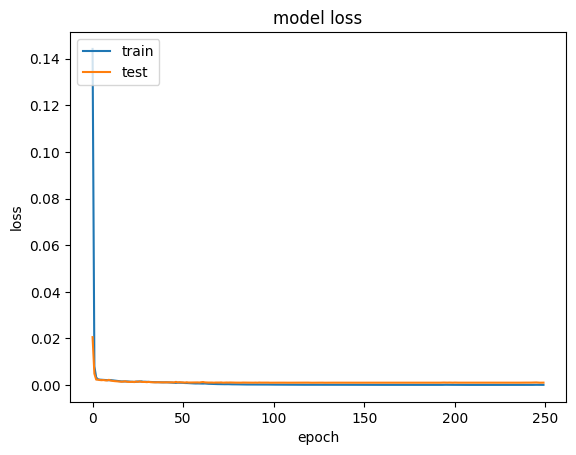

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

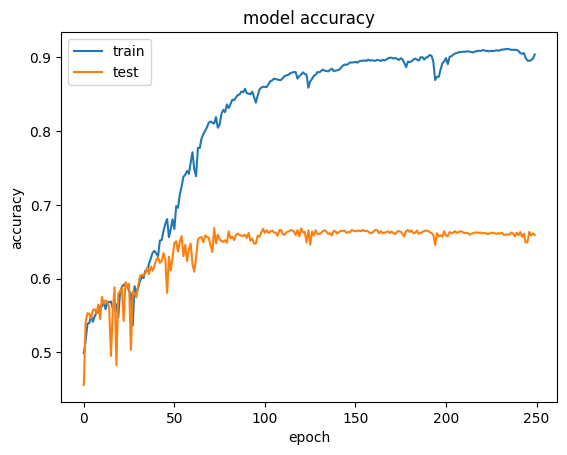

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#Freezing the encoder
transfer_layer_enc0 = model.get_layer('conv2d')
transfer_layer_enc1 = model.get_layer('conv2d_1')
transfer_layer_enc2 = model.get_layer('conv2d_2')
transfer_layer_enc3 = model.get_layer('conv2d_3')
transfer_layer_enc4 = model.get_layer('conv2d_4')
transfer_layer_enc5 = model.get_layer('conv2d_5')
transfer_layer_enc6 = model.get_layer('conv2d_6')
transfer_layer_enc7 = model.get_layer('conv2d_7')
transfer_layer_enc8 = model.get_layer('conv2d_8')
transfer_layer_enc9 = model.get_layer('conv2d_9')
transfer_layer_enc10 = model.get_layer('conv2d_10')

transfer_layer_enc0.trainable = False
transfer_layer_enc1.trainable = False
transfer_layer_enc2.trainable = False
transfer_layer_enc3.trainable = False
transfer_layer_enc4.trainable = False
transfer_layer_enc5.trainable = False
transfer_layer_enc6.trainable = False
transfer_layer_enc7.trainable = False
transfer_layer_enc8.trainable = False
transfer_layer_enc9.trainable = False
transfer_layer_enc10.trainable = False

In [15]:
# Fine-tuning
history2 = model.fit(X, Y, validation_split = 0.1, epochs = 20, verbose = 1)

Epoch 1/20
9/9 [==============================] - 2s 187ms/step - loss: 8.8202e-05 - accuracy: 0.9016 - val_loss: 0.0011 - val_accuracy: 0.6534
Epoch 2/20
9/9 [==============================] - 2s 181ms/step - loss: 8.6108e-05 - accuracy: 0.9016 - val_loss: 0.0010 - val_accuracy: 0.6618
Epoch 3/20
9/9 [==============================] - 2s 182ms/step - loss: 8.3085e-05 - accuracy: 0.9028 - val_loss: 0.0011 - val_accuracy: 0.6594
Epoch 4/20
9/9 [==============================] - 2s 180ms/step - loss: 7.7501e-05 - accuracy: 0.9093 - val_loss: 0.0010 - val_accuracy: 0.6620
Epoch 5/20
9/9 [==============================] - 2s 180ms/step - loss: 7.3661e-05 - accuracy: 0.9108 - val_loss: 0.0010 - val_accuracy: 0.6594
Epoch 6/20
9/9 [==============================] - 2s 182ms/step - loss: 7.2261e-05 - accuracy: 0.9119 - val_loss: 0.0010 - val_accuracy: 0.6605
Epoch 7/20
9/9 [==============================] - 2s 181ms/step - loss: 6.9834e-05 - accuracy: 0.9125 - val_loss: 0.0010 - val_accuracy:

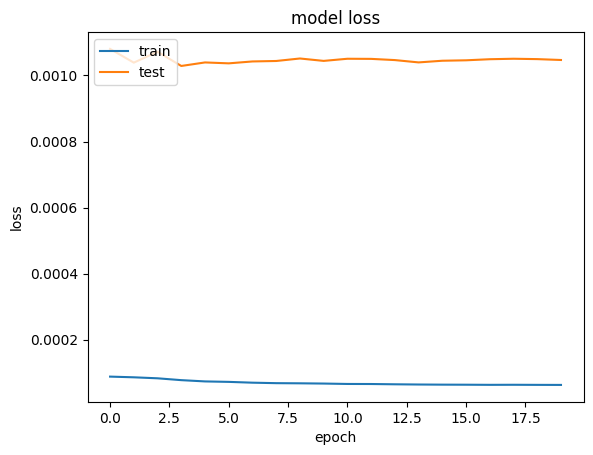

In [16]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

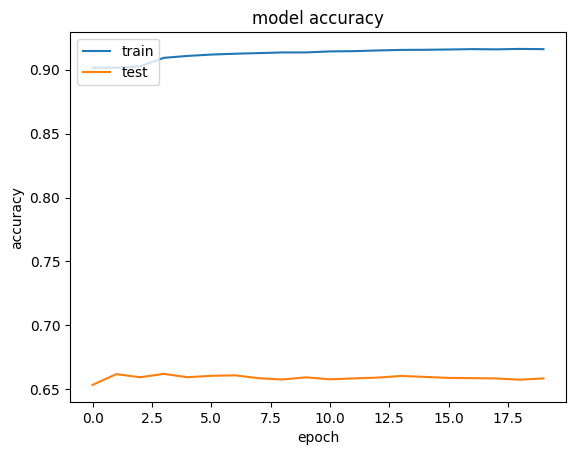

In [17]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
model.save('model') # saving our network

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [19]:
test = []
for filename in os.listdir(test_dir):
    test.append(img_to_array(load_img(test_dir + filename)))
test = np.array(test, dtype = float)

In [20]:
test = test / 255

In [21]:
test.shape

(20, 128, 128, 3)

In [22]:
#Convert to LAB
test_img = []
for img in test:
    try:
        lab = rgb2lab(img)
        test_img.append(lab[:,:,0])
    except:
        print('error')
test_img = np.array(test_img)

test_img = test_img.reshape(test_img.shape+(1,)) #dimensions to be the same for test_img

gray_img = []
for i in range(0, len(test_img)):
    grayscale = np.zeros((128, 128, 3))
    grayscale[:,:,0] = test_img[i][:,:,0]
    gray_img.append(lab2rgb(grayscale))
gray_img = np.array(gray_img)

output1 = model.predict(test_img)
output1 = output1 * 128

color_img = []
for i in range(0, len(test_img)):
    result = np.zeros((128, 128, 3))
    result[:,:,0] = test_img[i][:,:,0]
    result[:,:,1:] = output1[i]
    color_img.append(lab2rgb(result))
color_img = np.array(color_img)

1/1 [==============================] - 2s 2s/step


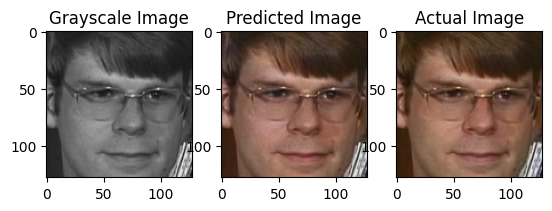

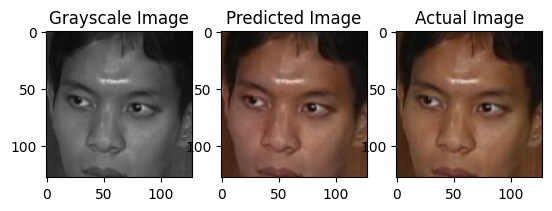

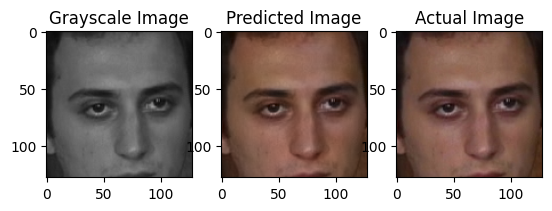

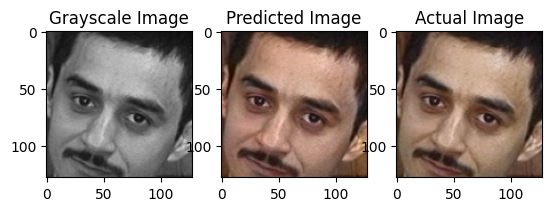

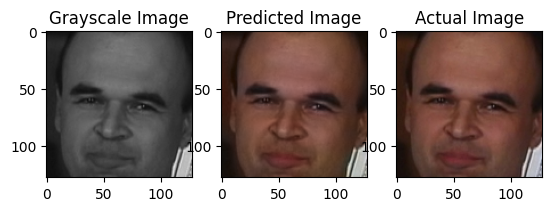

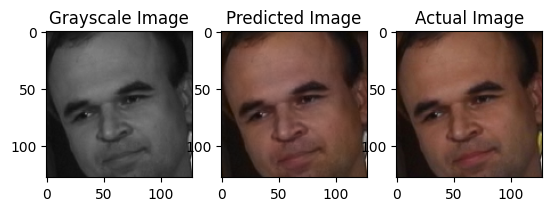

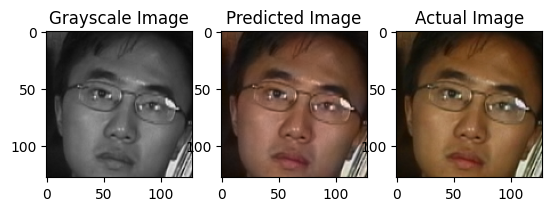

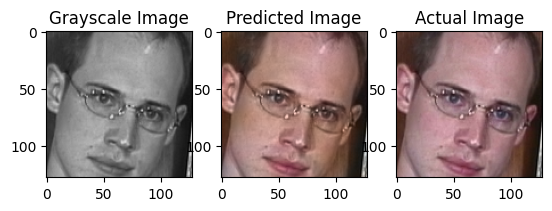

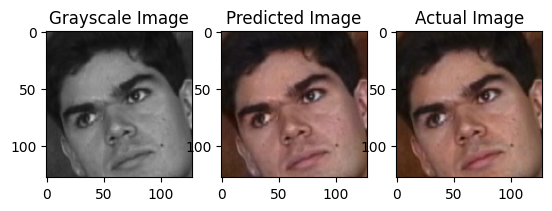

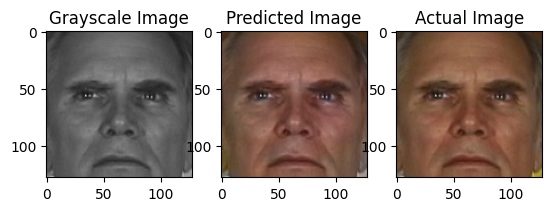

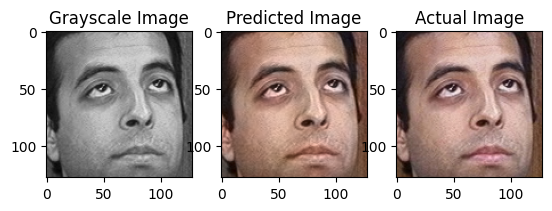

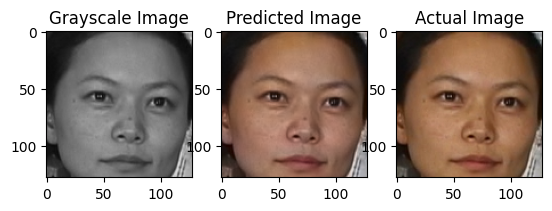

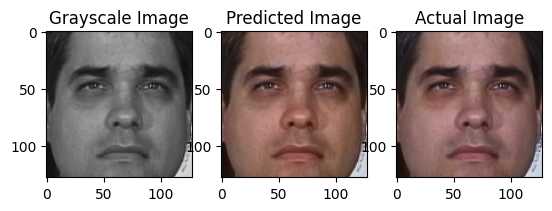

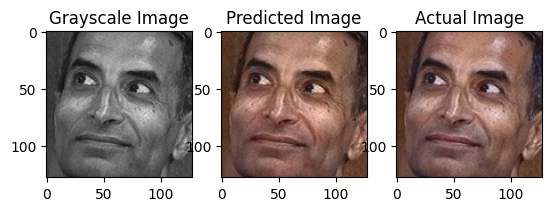

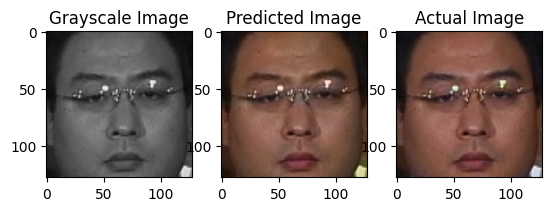

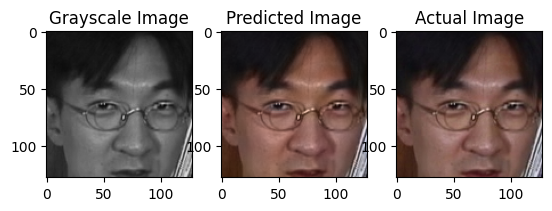

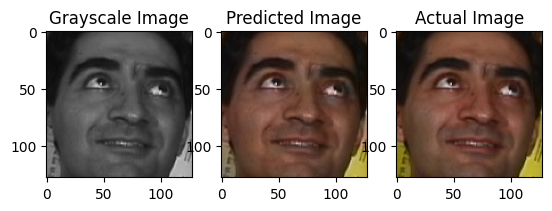

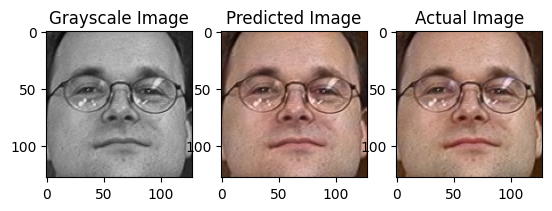

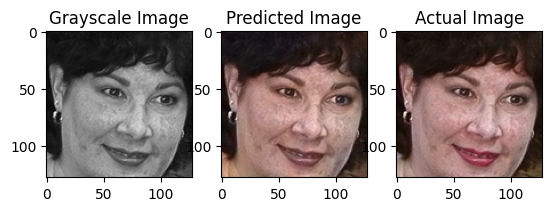

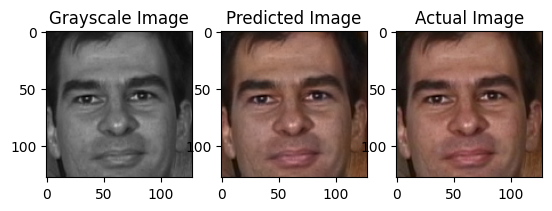

In [23]:
for i in range(0, len(test_img)):
    f, axarr = plt.subplots(1,3)
    axarr[0].set_title('Grayscale Image')
    axarr[0].imshow(gray_img[i])
    axarr[1].set_title('Predicted Image')
    axarr[1].imshow(color_img[i])
    axarr[2].set_title('Actual Image')
    axarr[2].imshow(test[i])